In [2]:
import kagglehub

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
# Download latest version
# path = kagglehub.dataset_download("danofer/compass")
path = "data/raw/"

# print("Path to dataset files:", path)

df_compass_sample = pd.read_csv(path + "compas_sample.csv")
df_compass_sample.head()

,age,race,sex,priors_count,c_charge_degree,decile_score,days_b_screening_arrest,score_text,age_cat,two_year_recid
0,40,African-American,Male,1.0,M,10,-30.0,High,25 - 45,1
1,33,African-American,Male,2.0,M,5,-3.0,Medium,25 - 45,1
2,42,Caucasian,Male,3.0,M,10,30.0,High,25 - 45,1
3,53,Hispanic,Male,1.0,M,4,-23.0,Medium,Greater than 45,1
4,32,African-American,Female,0.0,F,2,-29.0,Low,25 - 45,0


In [4]:
df_compass_sample.shape

(1000, 10)

In [5]:
df_compass_score_raw = pd.read_csv(path + "compas-scores-raw.csv")
df_compass_score_raw.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


In [6]:
df_compass_score_raw.shape

(60843, 28)

In [7]:
df_cox_violent_parsed_filt = pd.read_csv(path + "cox-violent-parsed_filt.csv")
df_cox_violent_parsed_filt.head()


,id,name,first,last,sex,dob,age,age_cat,race,juv_fel_count,...,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,event
0,1.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
1,2.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
2,3.0,michael ryan,michael,ryan,Male,06/02/1985,31,25 - 45,Caucasian,0,...,NaN,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,0,0
3,4.0,kevon dixon,kevon,dixon,Male,22/01/1982,34,25 - 45,African-American,0,...,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,0,1
4,5.0,ed philo,ed,philo,Male,14/05/1991,24,Less than 25,African-American,0,...,NaN,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,4,0


In [8]:
df_cox_violent_parsed_filt.shape

(18316, 40)

In [9]:
df_cox_violent_parsed = pd.read_csv(path + "cox-violent-parsed.csv")
df_cox_violent_parsed.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event
0,1.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,0,327,0
1,2.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,334,961,0
2,3.0,michael ryan,michael,ryan,31/12/2014,Male,06/02/1985,31,25 - 45,Caucasian,...,Risk of Violence,2,Low,31/12/2014,30/12/2014,03/01/2015,0,3,457,0
3,4.0,kevon dixon,kevon,dixon,27/01/2013,Male,22/01/1982,34,25 - 45,African-American,...,Risk of Violence,1,Low,27/01/2013,26/01/2013,05/02/2013,0,9,159,1
4,5.0,ed philo,ed,philo,14/04/2013,Male,14/05/1991,24,Less than 25,African-American,...,Risk of Violence,3,Low,14/04/2013,16/06/2013,16/06/2013,4,0,63,0


In [10]:
df_cox_violent_parsed_filt.shape

(18316, 40)

In [11]:
df_propublica_data_for_fairml = pd.read_csv(path + "propublica_data_for_fairml.csv")
df_propublica_data_for_fairml.head()

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0
2,1,4,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,1
4,1,14,1,0,0,0,0,0,0,0,0,0


In [12]:
df_propublica_data_for_fairml.shape

(6172, 12)

## Propublica Data

In [13]:
df = df_propublica_data_for_fairml.copy()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6172 entries, 0 to 6171
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Two_yr_Recidivism     6172 non-null   int64
 1   Number_of_Priors      6172 non-null   int64
 2   score_factor          6172 non-null   int64
 3   Age_Above_FourtyFive  6172 non-null   int64
 4   Age_Below_TwentyFive  6172 non-null   int64
 5   African_American      6172 non-null   int64
 6   Asian                 6172 non-null   int64
 7   Hispanic              6172 non-null   int64
 8   Native_American       6172 non-null   int64
 9   Other                 6172 non-null   int64
 10  Female                6172 non-null   int64
 11  Misdemeanor           6172 non-null   int64
dtypes: int64(12)
memory usage: 578.8 KB


In [15]:
for col in df.columns:
    print(col)



Two_yr_Recidivism
Number_of_Priors
score_factor
Age_Above_FourtyFive
Age_Below_TwentyFive
African_American
Asian
Hispanic
Native_American
Other
Female
Misdemeanor


### EDA

#### EDA Univariée

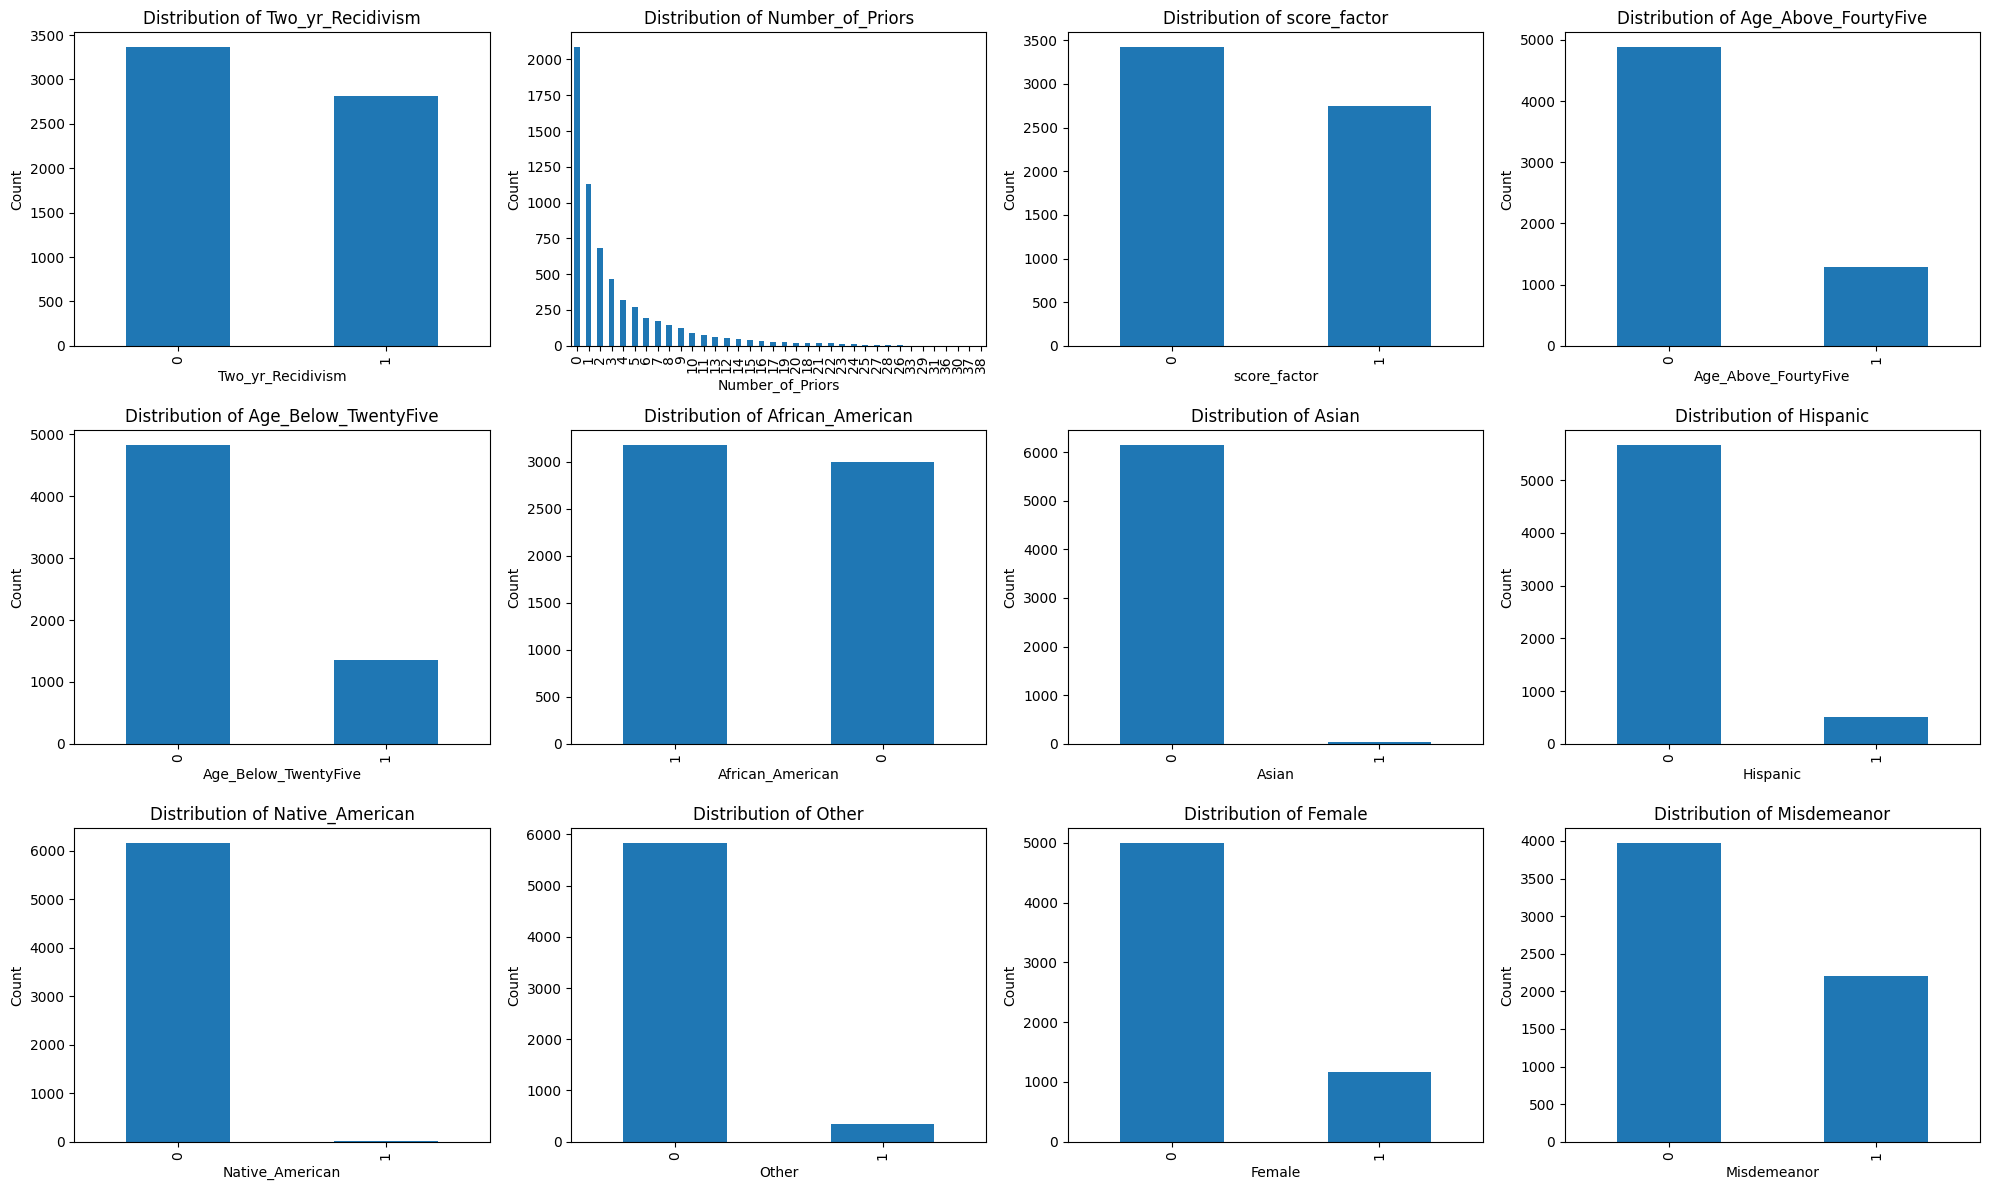

In [16]:
# Barplots for all columns in df, 4 per row in a single figure
n_cols = 4
n_rows = int(np.ceil(len(df.columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))

for idx, col in enumerate(df.columns):
    ax = axes[idx // n_cols, idx % n_cols]
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution of {col}')

# Hide unused subplots
for idx in range(len(df.columns), n_rows * n_cols):
    fig.delaxes(axes[idx // n_cols, idx % n_cols])

plt.tight_layout()
plt.show()

##### Two_yr_Recidivism

In [17]:
df.Two_yr_Recidivism

0       0
1       1
2       1
3       0
4       1
       ..
6167    0
6168    0
6169    0
6170    0
6171    1
Name: Two_yr_Recidivism, Length: 6172, dtype: int64

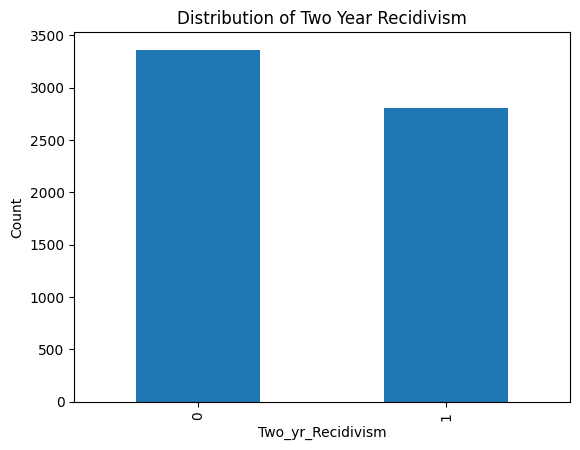

In [18]:
# Univariate EDA for 'Two_yr_Recidivism'
var = 'Two_yr_Recidivism'
df[var].value_counts().plot(kind='bar')
plt.xlabel(var)
plt.ylabel('Count')
plt.title('Distribution of Two Year Recidivism')
plt.show()

##### Number_of_Priors

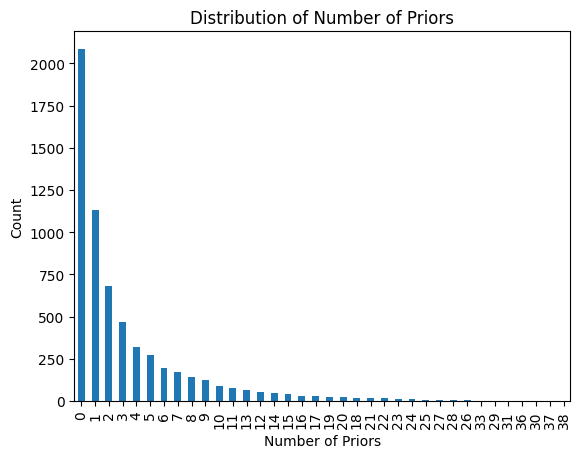

In [19]:
df.Number_of_Priors.value_counts().plot(kind='bar')
plt.xlabel('Number of Priors')
plt.ylabel('Count')
plt.title('Distribution of Number of Priors')
plt.show()

##### score_factor

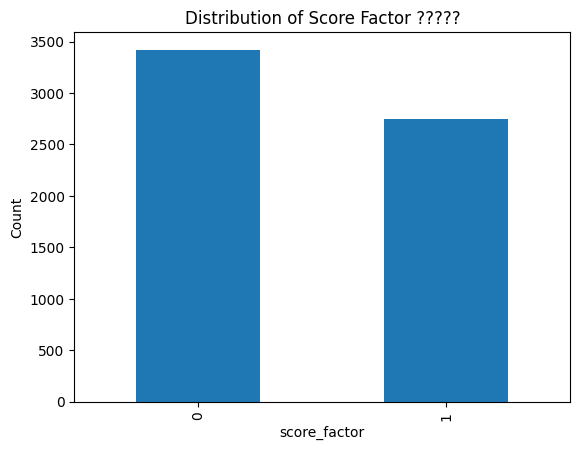

In [20]:
# Univariate EDA for 'score_factor'
var = 'score_factor'
df[var].value_counts().plot(kind='bar')
plt.xlabel(var)
plt.ylabel('Count')
plt.title('Distribution of Score Factor ?????')
plt.show()

Age_Above_FourtyFive

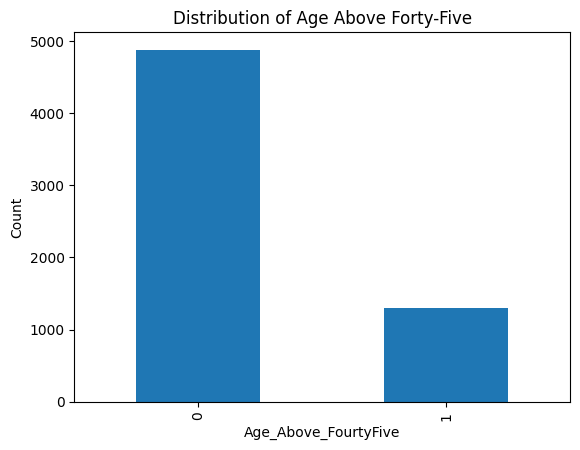

In [21]:
var = "Age_Above_FourtyFive"
df[var].value_counts().plot(kind='bar')
plt.xlabel(var)
plt.ylabel('Count')
plt.title('Distribution of Age Above Forty-Five')
plt.show()

##### Two_yr_Recidivism

In [22]:
df.Two_yr_Recidivism

0       0
1       1
2       1
3       0
4       1
       ..
6167    0
6168    0
6169    0
6170    0
6171    1
Name: Two_yr_Recidivism, Length: 6172, dtype: int64

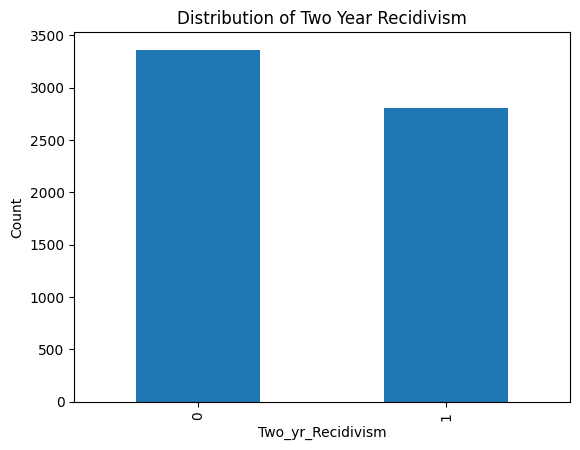

In [23]:
# Univariate EDA for 'Two_yr_Recidivism'
var = 'Two_yr_Recidivism'
df[var].value_counts().plot(kind='bar')
plt.xlabel(var)
plt.ylabel('Count')
plt.title('Distribution of Two Year Recidivism')
plt.show()

##### Two_yr_Recidivism

In [24]:
df.Two_yr_Recidivism

0       0
1       1
2       1
3       0
4       1
       ..
6167    0
6168    0
6169    0
6170    0
6171    1
Name: Two_yr_Recidivism, Length: 6172, dtype: int64

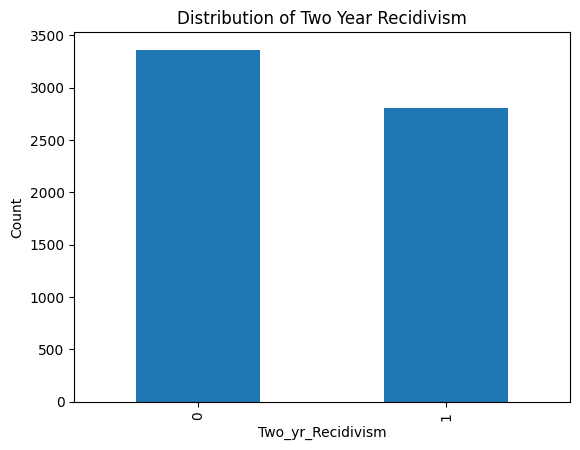

In [25]:
# Univariate EDA for 'Two_yr_Recidivism'
var = 'Two_yr_Recidivism'
df[var].value_counts().plot(kind='bar')
plt.xlabel(var)
plt.ylabel('Count')
plt.title('Distribution of Two Year Recidivism')
plt.show()

##### Two_yr_Recidivism

In [26]:
df.Two_yr_Recidivism

0       0
1       1
2       1
3       0
4       1
       ..
6167    0
6168    0
6169    0
6170    0
6171    1
Name: Two_yr_Recidivism, Length: 6172, dtype: int64

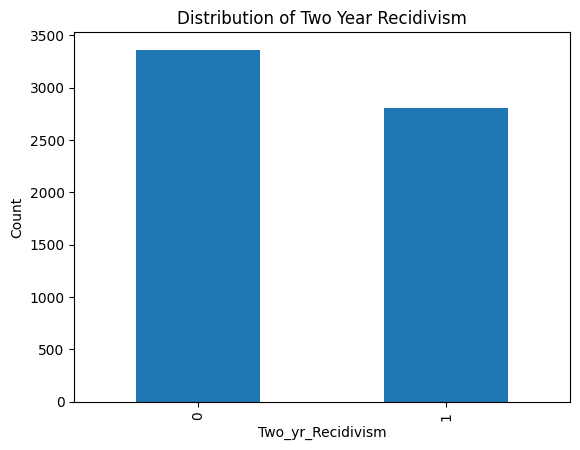

In [27]:
# Univariate EDA for 'Two_yr_Recidivism'
var = 'Two_yr_Recidivism'
df[var].value_counts().plot(kind='bar')
plt.xlabel(var)
plt.ylabel('Count')
plt.title('Distribution of Two Year Recidivism')
plt.show()

##### Two_yr_Recidivism

In [28]:
df.Two_yr_Recidivism

0       0
1       1
2       1
3       0
4       1
       ..
6167    0
6168    0
6169    0
6170    0
6171    1
Name: Two_yr_Recidivism, Length: 6172, dtype: int64

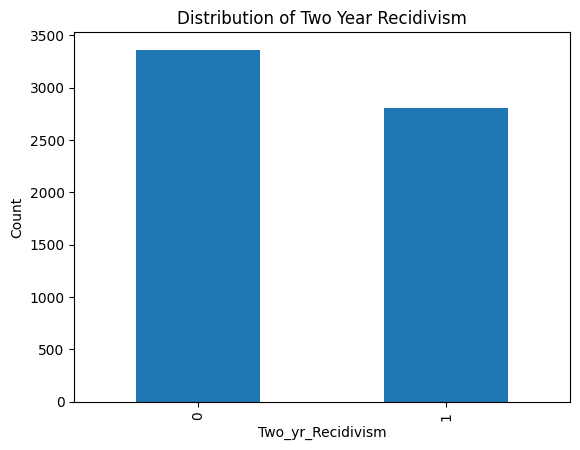

In [29]:
# Univariate EDA for 'Two_yr_Recidivism'
var = 'Two_yr_Recidivism'
df[var].value_counts().plot(kind='bar')
plt.xlabel(var)
plt.ylabel('Count')
plt.title('Distribution of Two Year Recidivism')
plt.show()

##### Two_yr_Recidivism

In [30]:
df.Two_yr_Recidivism

0       0
1       1
2       1
3       0
4       1
       ..
6167    0
6168    0
6169    0
6170    0
6171    1
Name: Two_yr_Recidivism, Length: 6172, dtype: int64

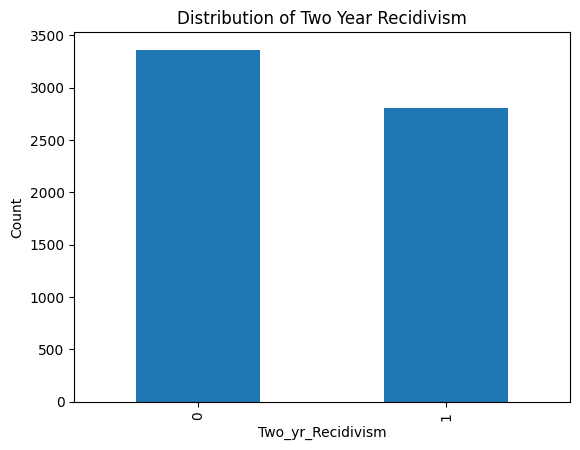

In [31]:
# Univariate EDA for 'Two_yr_Recidivism'
var = 'Two_yr_Recidivism'
df[var].value_counts().plot(kind='bar')
plt.xlabel(var)
plt.ylabel('Count')
plt.title('Distribution of Two Year Recidivism')
plt.show()

##### Two_yr_Recidivism

In [32]:
df.Two_yr_Recidivism

0       0
1       1
2       1
3       0
4       1
       ..
6167    0
6168    0
6169    0
6170    0
6171    1
Name: Two_yr_Recidivism, Length: 6172, dtype: int64

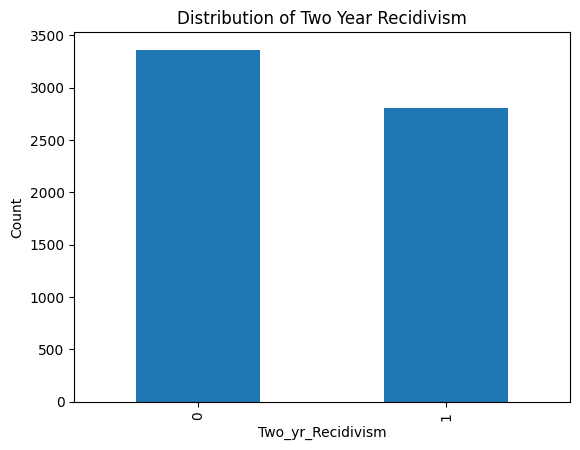

In [33]:
# Univariate EDA for 'Two_yr_Recidivism'
var = 'Two_yr_Recidivism'
df[var].value_counts().plot(kind='bar')
plt.xlabel(var)
plt.ylabel('Count')
plt.title('Distribution of Two Year Recidivism')
plt.show()

##### Two_yr_Recidivism

In [34]:
df.Two_yr_Recidivism

0       0
1       1
2       1
3       0
4       1
       ..
6167    0
6168    0
6169    0
6170    0
6171    1
Name: Two_yr_Recidivism, Length: 6172, dtype: int64

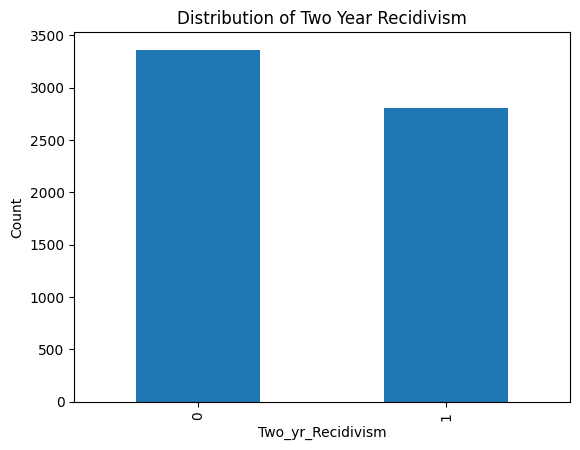

In [35]:
# Univariate EDA for 'Two_yr_Recidivism'
var = 'Two_yr_Recidivism'
df[var].value_counts().plot(kind='bar')
plt.xlabel(var)
plt.ylabel('Count')
plt.title('Distribution of Two Year Recidivism')
plt.show()

In [36]:
# Transformation du DataFrame selon les colonnes demandées

# Création de la colonne 'Age'
df['Age'] = np.select(
    [
        df['Age_Above_FourtyFive'] == 1,
        df['Age_Below_TwentyFive'] == 1
    ],
    [
        'Above_45',
        'Below_25'
    ],
    default='25_to_45'
)

# Création de la colonne 'Race'
race_columns = ['African_American', 'Asian', 'Hispanic', 'Native_American', 'Other']
def get_race(row):
    for col in race_columns:
        if row[col] == 1:
            return col
    return 'Caucasian'
df['Race'] = df.apply(get_race, axis=1)

# Création de la colonne 'Sexe'
df['Sexe'] = df['Female'].map({1: 'Female', 0: 'Male'})

# Sélection et renommage des colonnes
df_transformed = df.rename(columns={
    'Two_yr_Recidivism': 'Two_yr_RecidivismNumber_of_Priors',
    'Number_of_Priors': 'Number_of_Priors',
    'score_factor': 'score_factor',
    'Misdemeanor': 'Misdemeanor'
})[['Two_yr_RecidivismNumber_of_Priors', 'Number_of_Priors', 'Age', 'Race', 'Sexe', 'Misdemeanor']]

df_transformed.head()

,Two_yr_RecidivismNumber_of_Priors,Number_of_Priors,Age,Race,Sexe,Misdemeanor
0,0,0,Above_45,Other,Male,0
1,1,0,25_to_45,African_American,Male,0
2,1,4,Below_25,African_American,Male,0
3,0,0,25_to_45,Other,Male,1
4,1,14,25_to_45,Caucasian,Male,0


<Axes: xlabel='Race'>

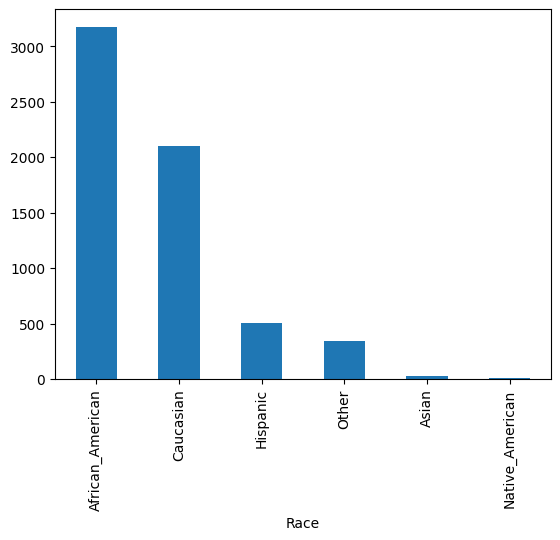

In [37]:
df_transformed.Race.value_counts().plot(kind='bar')

#### EDA Bivariée

##### Data Transformation

<Axes: xlabel='Race'>

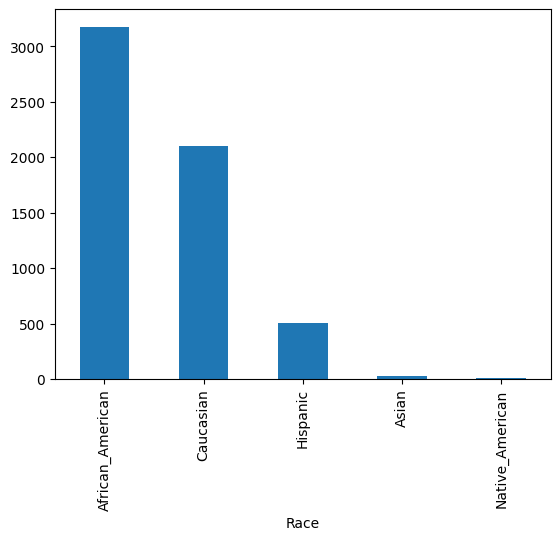

In [38]:
df_transformed_no_other = df_transformed[df_transformed.Race != "Other"]
df_transformed_no_other.Race.value_counts().plot(kind='bar')